In [475]:
import pandas as pd
pd.set_option("display.float_format", "{:.3f}".format)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.utils import Bunch
from sklearn.metrics import (
    balanced_accuracy_score,
    roc_auc_score,
    accuracy_score,
    recall_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    RocCurveDisplay)
from sklearn.metrics import classification_report
from sklearn.utils import class_weight
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import shap
import seaborn as sns
from IPython.display import display, Markdown, Latex


In [2]:
# Simple Function to calcuate CVD
def calculate_CVD(a,b,c,d,e):
    col=0
    if (int(a)==1 or int(b)==1 or int(c)==1 or int(d)==1 or int(e)==1):
        col=1
    elif (int(a)==0 and int(b)==0 and int(c)==0 and int(d)==0 and int(e)==0):
        col = 0
    elif (int(a)==pd.isna and int(b)==pd.isna and int(c)==pd.isna and int(d)==pd.isna and int(e)==pd.isna):
        col = 0
    return col

In [336]:
dff = pd.read_csv('/Users/kayadetunji/Documents/AWI_GEN_PROJECT/AWI_HC.csv').drop(columns = ['Unnamed: 0', 'study_id', 'chf_meds_qc','angina_meds_qc', 'pain_action_stop_or_slow_qc', 'pain_action_rest_qc',
       'pain_action_medicine_qc', 'pain_action_carry_on_qc',
       'relief_standstill_qc', 'relief_standstill_qc.1', 'pain_location_1_qc',
       'pain_location_2_qc', 'pain_location_3_qc', 'pain_location_4_qc',
       'pain_location_5_qc', 'pain_location_6_qc', 'pain_location_7_qc',
       'pain_location_8_qc', 'pain_location_9_qc', 'pain_location_10_qc',
       'pain_location_11_qc', 'pain_location_12_qc', 'pain_location_13_qc',
       'pain_location_14_qc', 'pain_location_15_qc', 'pain_location_16_qc',
       'pain_location_17_qc', 'pain_location_18_qc','angina_treat_now_qc', 'angina_traditional_qc', 'pain_qc', 'pain2_qc'])

In [338]:
predictor_cols = ['site', 'age', 'sex', 'number_of_children_c', 
        'partnership_status_c_qc', 'highest_level_of_education_qc', 'occupation_qc',
       'ses_site_quintile_c_qc', 'smoking_status_c_qc', 'alcohol_use_status_c_qc', 
#        'days_fruit_qc', 'days_veg_qc', 'days_bread_qc', 'sugardrinks_qc', 
       'avg_sleep_per_night_c', 'mvpa_c',
#        'asthma_qc', 
       'obesity_mom_qc','hiv_final_status_c', 'pesticide_qc',
       'waist_circumference_qc', 'hip_circumference_qc', 
       'waist_hip_r_c_qc','bp_sys_average_qc', 'pulse_average_qc',
       'visceral_fat_qc', 'subcutaneous_fat_qc', 'mean_cimt_right_qc',
       'mean_cimt_left_qc','friedewald_ldl_c_c_qc', 'triglycerides_qc',
       'acr_qc','bmi_c_qc', 'cholesterol_1_qc','pain_qc', 'pain2_qc']
outcome_cols = ['CVD']

In [337]:
dff.columns

Index(['site', 'age', 'sex', 'number_of_children_c', 'partnership_status_c_qc',
       'highest_level_of_education_qc', 'occupation_qc',
       'ses_site_quintile_c_qc', 'smoking_status_c_qc',
       'alcohol_use_status_c_qc', 'days_fruit_qc', 'days_veg_qc',
       'days_bread_qc', 'sugardrinks_qc', 'avg_sleep_per_night_c', 'mvpa_c',
       'asthma_qc', 'obesity_mom_qc', 'hiv_final_status_c', 'pesticide_qc',
       'waist_circumference_qc', 'hip_circumference_qc', 'waist_hip_r_c_qc',
       'bp_sys_average_qc', 'bp_dia_average_qc', 'pulse_average_qc',
       'visceral_fat_qc', 'subcutaneous_fat_qc', 'mean_cimt_right_qc',
       'mean_cimt_left_qc', 's_creatinine_qc', 'ldl_qc',
       'friedewald_ldl_c_c_qc', 'triglycerides_qc', 'acr_qc', 'egfr_c_qc',
       'cholesterol_1_qc', 'stroke_qc', 'stroke_diagnosed_qc',
       'transient_ischemic_attack_qc', 'weakness_qc', 'numbness_qc',
       'blindness_qc', 'half_vision_loss_qc', 'understanding_loss_qc',
       'expression_loss_qc', 'angina

In [339]:
# Simple Function to calcuate CVD
def calculate_CVD(a,b,c,d,e):
    col=0
    if (int(a)==1 or int(b)==1 or int(c)==1 or int(d)==1 or int(e)==1):
        col=1
    elif (int(a)==0 and int(b)==0 and int(c)==0 and int(d)==0 and int(e)==0):
        col = 0
    elif (int(a)==pd.isna and int(b)==pd.isna and int(c)==pd.isna and int(d)==pd.isna and int(e)==pd.isna):
        col = 0
    return col

In [340]:
# dff.value_counts()[1]/dff.value_counts().sum()*100
# dff.value_counts()
dff.isnull().sum()/dff.shape[0]
dff


,site,age,sex,number_of_children_c,partnership_status_c_qc,highest_level_of_education_qc,occupation_qc,ses_site_quintile_c_qc,smoking_status_c_qc,alcohol_use_status_c_qc,...,heartattack_treatment_qc,heartattack_traditional_qc,congestive_heart_failure_qc,chf_treatment_yn_qc,chf_treat_now_qc,chf_traditional_qc,cadiovascular_current,htn_jnc7_qc,diabetes_status_c_qc,bmi_c_qc
0,1,80,1,10.0,1,0,-999,1,2,3,...,-999,0,0,-999,-999,0,NaN,1,0,22.26
1,1,73,1,5.0,1,0,4,4,0,3,...,-999,0,0,-999,-999,0,NaN,1,0,36.99
2,1,80,1,9.0,2,0,4,2,0,0,...,-999,0,0,-999,-999,0,NaN,0,0,21.57
3,1,79,0,4.0,1,0,3,2,0,0,...,-999,0,0,-999,-999,0,NaN,1,0,21.92
4,1,73,0,7.0,2,0,3,3,0,0,...,-999,0,0,-999,-999,0,NaN,1,0,28.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12027,6,57,0,NaN,2,1,1,2,0,-999,...,-999,-999,-999,-999,-999,-999,NaN,1,1,24.31
12028,2,50,0,3.0,0,2,1,2,0,0,...,-999,0,0,-999,-999,0,0.0,1,0,24.63
12029,1,76,1,3.0,1,0,4,1,0,1,...,-999,0,0,-999,-999,0,NaN,0,0,17.24
12030,2,59,0,7.0,2,2,3,5,0,0,...,-999,0,2,-999,-999,0,0.0,0,0,36.06


In [290]:
dff1 = dff.mask(dff == -999, np.nan).copy()

[IterativeImputer] Early stopping criterion not reached.


<Axes: ylabel='Density'>

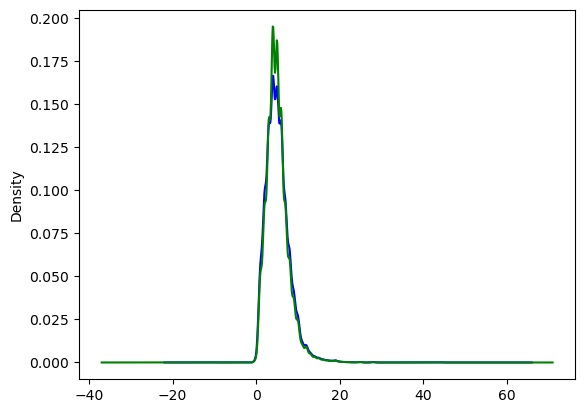

In [292]:
from sklearn.linear_model import BayesianRidge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer_bayes = IterativeImputer(
    estimator=BayesianRidge(),
    max_iter=10,
    random_state=0)

# let's create a MICE imputer using Bayes as estimator

imputer = IterativeImputer(
    estimator=BayesianRidge(), # the estimator to predict the NA
    initial_strategy='mean', # how will NA be imputed in step 1
    max_iter=10, # number of cycles
    imputation_order='ascending', # the order in which to impute the variables
    n_nearest_features=None, # whether to limit the number of predictors
    skip_complete=True, # whether to ignore variables without NA
    random_state=0,
)
imputer.fit(dff1[predictor_cols])
train_t = imputer.transform(dff1[predictor_cols])
# train_x = imputer.transform(data.iloc[:,2:])
treated = pd.DataFrame(train_t, columns=dff1[predictor_cols].columns)
treated = treated.apply(np.ceil)

fig = plt.figure()
ax = fig.add_subplot(111)
dff['number_of_children_c'].plot(kind='kde', ax=ax, color='blue')
treated['number_of_children_c'].plot(kind='kde', ax=ax, color='green')

In [294]:
treated[predictor_cols]

,site,age,sex,number_of_children_c,partnership_status_c_qc,highest_level_of_education_qc,occupation_qc,ses_site_quintile_c_qc,smoking_status_c_qc,alcohol_use_status_c_qc,...,mean_cimt_left_qc,s_creatinine_qc,ldl_qc,friedewald_ldl_c_c_qc,triglycerides_qc,acr_qc,bmi_c_qc,cholesterol_1_qc,pain_qc,pain2_qc
0,1.0,80.0,1.0,10.0,1.0,0.0,4.0,1.0,2.0,3.0,...,1.0,76.0,-12.0,2.0,3.0,-25.0,23.0,5.0,1.0,1.0
1,1.0,73.0,1.0,5.0,1.0,0.0,4.0,4.0,0.0,3.0,...,1.0,73.0,3.0,2.0,2.0,-42.0,37.0,3.0,0.0,0.0
2,1.0,80.0,1.0,9.0,2.0,0.0,4.0,2.0,0.0,0.0,...,1.0,72.0,4.0,3.0,1.0,-58.0,22.0,6.0,0.0,0.0
3,1.0,79.0,0.0,4.0,1.0,0.0,3.0,2.0,0.0,0.0,...,1.0,52.0,4.0,3.0,2.0,-45.0,22.0,5.0,0.0,0.0
4,1.0,73.0,0.0,7.0,2.0,0.0,3.0,3.0,0.0,0.0,...,1.0,66.0,5.0,3.0,2.0,-28.0,29.0,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12027,6.0,57.0,0.0,4.0,2.0,1.0,1.0,2.0,0.0,1.0,...,1.0,101.0,-6.0,4.0,1.0,-85.0,25.0,6.0,1.0,1.0
12028,2.0,50.0,0.0,3.0,0.0,2.0,1.0,2.0,0.0,0.0,...,1.0,74.0,-222.0,4.0,1.0,-111.0,25.0,6.0,0.0,0.0
12029,1.0,76.0,1.0,3.0,1.0,0.0,4.0,1.0,0.0,1.0,...,1.0,81.0,3.0,2.0,1.0,-46.0,18.0,4.0,0.0,0.0
12030,2.0,59.0,0.0,7.0,2.0,2.0,3.0,5.0,0.0,0.0,...,1.0,66.0,-222.0,5.0,2.0,4.0,37.0,7.0,0.0,0.0


In [135]:
# com1=[]
# for i in range(treated.shape[0]):
#     com1.append(calculate_CVD(treated.stroke_qc.iloc[i], treated.transient_ischemic_attack_qc.iloc[i], treated.heartattack_qc.iloc[i], treated.congestive_heart_failure_qc.iloc[i], treated.angina_qc.iloc[i]))
# y2=pd.DataFrame(com1, columns=['CVD'])

In [18]:
com=[]
for i in range(dff.shape[0]):
    com.append(calculate_CVD(dff.stroke_qc.iloc[i], dff.transient_ischemic_attack_qc.iloc[i], dff.heartattack_qc.iloc[i], dff.congestive_heart_failure_qc.iloc[i], dff.angina_qc.iloc[i]))

In [20]:
y1=pd.DataFrame(com, columns=['CVD'])

In [30]:
y1['CVD'].value_counts(normalize=True)

0    0.963182
1    0.036818
Name: CVD, dtype: float64

In [296]:
print(dff['htn_jnc7_qc'].value_counts(normalize=True))
print(dff['diabetes_status_c_qc'].value_counts(normalize=True))
print(dff['cadiovascular_current'].value_counts(normalize=True))
print(dff['htn_jnc7_qc'].value_counts())

0    0.622839
1    0.377161
Name: htn_jnc7_qc, dtype: float64
0    0.934176
1    0.065824
Name: diabetes_status_c_qc, dtype: float64
0.0    0.96398
1.0    0.03602
Name: cadiovascular_current, dtype: float64
0    7494
1    4538
Name: htn_jnc7_qc, dtype: int64


Text(0.5, 0, 'Sex')

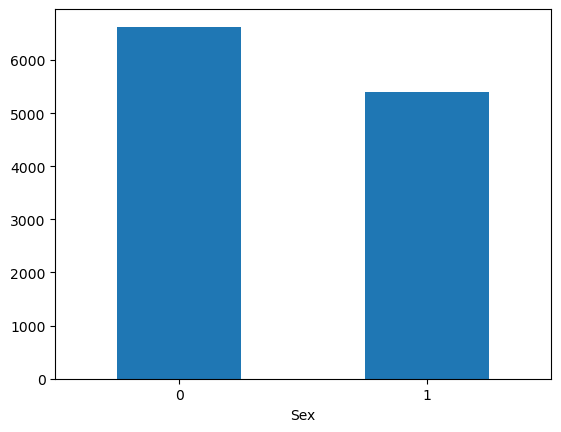

In [508]:
dff["sex"].value_counts().plot(kind='bar', rot=0)
plt.xlabel("Sex")

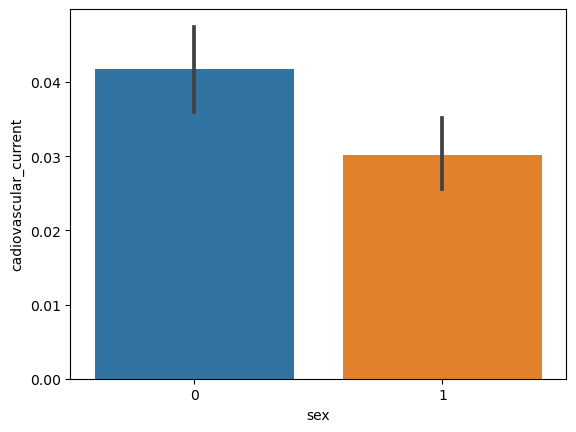

In [37]:
sns.barplot(x="sex", y="cadiovascular_current", data=dff, errorbar=('ci', 95));

In [297]:
# Split the data into train and test sets (stratified by sex)
# train_features, test_features, train_targets, test_targets = train_test_split(
#     dff[predictor_cols], y1, test_size=0.2, stratify=dff[['sex']], random_state=42)

# Split the data into train and test sets (stratified by sex)
train_features, test_features, train_targets, test_targets = train_test_split(
    treated[predictor_cols], y1, test_size=0.2, stratify=treated[['sex']], random_state=42)

### Resample the data (Undersampling given the target class imbalance)

In [298]:
def resample_dataset(X_train, Y_train):

  negative_ids = train_targets[train_targets['CVD'] == 0].index
  positive_ids = train_targets[train_targets['CVD'] == 1].index
  balanced_ids = positive_ids.union(np.random.choice(a=negative_ids, size=len(positive_ids)))

  X_train = X_train.loc[balanced_ids, :]
  Y_train = Y_train.loc[balanced_ids]
  return X_train, Y_train

In [140]:
X_train_bal, Y_train_bal = resample_dataset(train_features, train_targets)

In [299]:
dff_X_bal, dff_Y_bal = resample_dataset(treated[predictor_cols], y1)

In [300]:
# Split the data into train and test sets (stratified by sex)
train_features_bal, test_features_bal, train_targets_bal, test_targets_bal = train_test_split(
    dff_X_bal, dff_Y_bal, test_size=0.2, stratify=dff_X_bal[['sex']], random_state=42)

In [141]:
original_pipeline = Pipeline(steps=[
    ("preprocessing", StandardScaler()),
    ("XGBoost", xgb.XGBClassifier())
])

In [165]:
original_pipeline.fit(X_train_bal, Y_train_bal)

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('XGBoost',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=6, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, predictor='auto',
                               random_state=0, ...))])

In [301]:
original_pipeline.fit(train_features_bal, train_targets_bal)

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('XGBoost',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=6, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, predictor='auto',
                               random_state=0, ...))])

In [302]:
Y_pred_proba = original_pipeline.predict_proba(test_features_bal)[:,1]
Y_pred = original_pipeline.predict(test_features_bal)

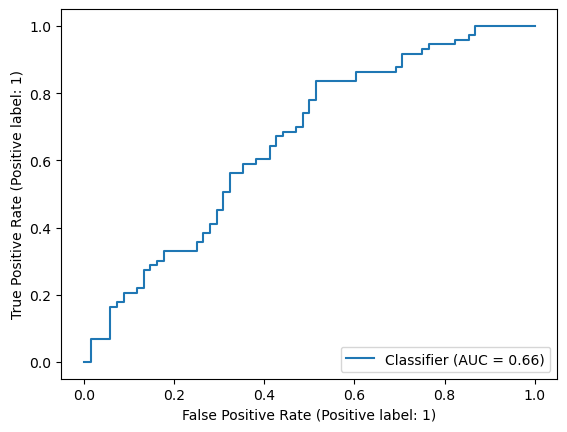

In [303]:
RocCurveDisplay.from_predictions(test_targets_bal, Y_pred_proba)

In [304]:
balanced_accuracy_score(test_targets_bal, Y_pred)

0.6180499597099114

## Human-centered Artificial Intelligence
### Fairness assesssment

The aim is to identify the harm and benefits and mitigate or improve them, respectively.\

A tentative questions would be: 
* How can we measure fairness or benefits in a machine learning model.
* Which group(s) are more susceptible to harm from the model.

Examples of susceptible groups are sex and even non/smokers. For example, the ML model may be quick to classify smokers as high risk for CVD events, and by extension, denying non-smokers the opportunity for better healthcare.

Therefore, there is a need to check for scenarios such as false negative rate: a scenario where patients are classified as prone to CVD events but the model does not recommend them, and selection rate: a scenarion where patients are effectively classified.

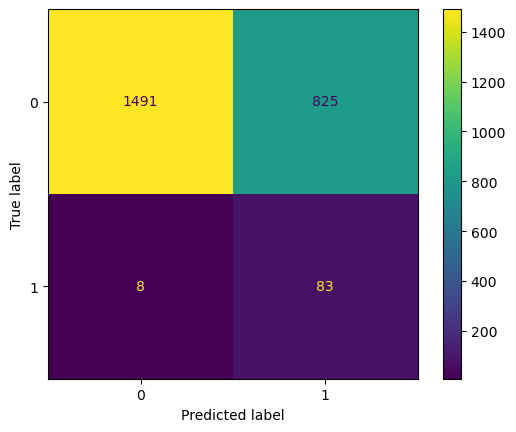

In [169]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# y_pred = clf.predict(test_features)
cm = confusion_matrix(test_targets, Y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
# fpr, tpr, _ = roc_curve(test_targets, Y_pred_proba, pos_label=original_pipeline.classes_[1])
# roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
RocCurveDisplay.from_predictions(test_targets, Y_pred_proba)

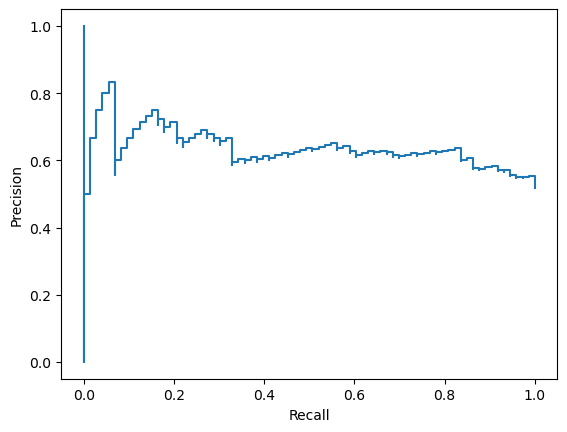

In [305]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(test_targets_bal, Y_pred_proba, pos_label=original_pipeline.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

In [306]:
from fairlearn.reductions import ExponentiatedGradient, DemographicParity
from sklearn.metrics import accuracy_score
from fairlearn.metrics import (
    MetricFrame,
    true_positive_rate,
    false_positive_rate,
    false_negative_rate,
    selection_rate,
    count,
    false_negative_rate_difference
)

from fairlearn.postprocessing import ThresholdOptimizer, plot_threshold_optimizer
from fairlearn.postprocessing._interpolated_thresholder import InterpolatedThresholder
from fairlearn.postprocessing._threshold_operation import ThresholdOperation
from fairlearn.reductions import ExponentiatedGradient, EqualizedOdds, TruePositiveRateParity

# Train a fairness-aware model using the ExponentiatedGradient algorithm with DemographicParity constraint
sensitive_feature = 'sex'  # Choose the sensitive feature used for fairness considerations
constraint = DemographicParity()
model = xgb.XGBClassifier()
fair_model = ExponentiatedGradient(model, constraint)
fair_model.fit(train_features_bal, train_targets_bal, sensitive_features=train_features_bal[sensitive_feature])

# Evaluate the fairness-aware model
fair_preds = fair_model.predict(test_features_bal)
print("Fairness-Aware Model:")
print(classification_report(test_targets_bal, fair_preds))
print("XGBoost:")
print(classification_report(test_targets_bal, Y_pred))

Fairness-Aware Model:
              precision    recall  f1-score   support

           0       0.58      0.62      0.60        68
           1       0.62      0.59      0.61        73

    accuracy                           0.60       141
   macro avg       0.60      0.60      0.60       141
weighted avg       0.60      0.60      0.60       141

XGBoost:
              precision    recall  f1-score   support

           0       0.59      0.65      0.62        68
           1       0.64      0.59      0.61        73

    accuracy                           0.62       141
   macro avg       0.62      0.62      0.62       141
weighted avg       0.62      0.62      0.62       141



In [307]:
print("XGBoost:")
print(recall_score(test_targets_bal['CVD'], Y_pred))

XGBoost:
0.589041095890411


In [212]:
test_features.sex.values.shape

(2407,)

In [308]:
from fairlearn.metrics import demographic_parity_difference
print(demographic_parity_difference(test_targets_bal.CVD.values,
                                    fair_preds,
                                    sensitive_features=test_features_bal.sex.values))
from fairlearn.metrics import demographic_parity_ratio
print(demographic_parity_ratio(test_targets_bal.CVD.values,
                                    fair_preds,
                                    sensitive_features=test_features_bal.sex.values))

0.02542372881355931
0.9491525423728814


In [309]:
from fairlearn.metrics import equalized_odds_difference
print(equalized_odds_difference(test_targets_bal.CVD.values,
                                    fair_preds,
                                    sensitive_features=test_features_bal.sex.values))

from fairlearn.metrics import equalized_odds_ratio
print(equalized_odds_ratio(test_targets_bal.CVD.values,
                                    fair_preds,
                                    sensitive_features=test_features_bal.sex.values))
from fairlearn.metrics import make_derived_metric, MetricFrame
from sklearn.metrics import recall_score
recall_difference = make_derived_metric(metric=recall_score,
                                       transform='difference')
recall_difference(test_targets_bal.CVD.values,
                                    fair_preds,
                                    sensitive_features=test_features_bal.sex.values)
MetricFrame(metrics=recall_score,
            y_true=test_targets_bal.CVD.values,
            y_pred=fair_preds,
            sensitive_features=test_features_bal.sex.values).difference()

0.016666666666666607
0.9722222222222223


0.016666666666666607

In [310]:
import functools
from sklearn.metrics import fbeta_score
fbeta_06 = functools.partial(fbeta_score, beta=0.6)
metric_beta = MetricFrame(metrics=fbeta_06,
                          y_true=test_targets_bal.CVD.values,
                          y_pred=fair_preds,
                          sensitive_features=test_features_bal.sex.values)
# metric_beta.difference()
# metric_beta.by_group
# metric_beta.ratio()
metric_beta.overall

Supplied 'func' had no __name__ attribute


0.6137699412258606

In [385]:
s_w = test_features_bal.smoking_status_c_qc
s_p = { 'sample_weight':s_w }
weighted = MetricFrame(metrics=recall_score,
                       y_true=test_targets_bal.CVD,
                       y_pred=fair_preds,
                       sensitive_features=pd.Series(test_features_bal.sex, name='SEX'),
                       sample_params=s_p)
print(weighted.overall)
print(weighted.by_group)

0.5714285714285714
SEX
0.0    0.333333
1.0    0.636364
Name: recall_score, dtype: float64


In [446]:
tdf = pd.DataFrame(dict(y_true=test_targets_bal.CVD, y_pred=Y_pred, sex=test_features_bal['sex'].astype(str)))

def compute_mf(df:pd.DataFrame) -> pd.DataFrame:
    mf1 = MetricFrame(metrics={"false negative rate":false_negative_rate, "selection rate": selection_rate},
                  y_true=df.y_true,
                  y_pred=df.y_pred,
                  sensitive_features=test_features_bal['sex'])
    return mf1.by_group.reset_index()

compute_mf(tdf)

,sex,false negative rate,selection rate
0,0.000,0.396,0.512
1,1.000,0.440,0.424


In [470]:
s_w_1 = test_features_bal.smoking_status_c_qc
s_w_2 = test_features_bal.alcohol_use_status_c_qc
tdd = pd.DataFrame(dict(y_true=test_targets_bal.CVD, y_pred=fair_preds, smoking=s_w_1.astype(str), alcohol=s_w_2))
metrics = {
   'recall' : recall_score,
   'recall_weighted' : recall_score,
   'recall_weight_2' : recall_score
}
s_p = {
    'recall_weighted' : { 'sample_weight':s_w_1 },
    'recall_weight_2' : { 'sample_weight':s_w_2 }
}
def compute_mf2(df:pd.DataFrame) -> pd.DataFrame:
    weighted = MetricFrame(metrics=metrics,
                        y_true=df.y_true,
                        y_pred=df.y_pred,
                        sensitive_features=pd.Series(test_features_bal.sex, name='Sex'),
                        sample_params=s_p)
    return weighted.by_group.reset_index()
compute_mf2(tdd)

,Sex,recall,recall_weighted,recall_weight_2
0,0.000,0.604,0.333,0.711
1,1.000,0.680,0.727,0.732


In [434]:
s_w_2 = test_features_bal.alcohol_use_status_c_qc.values
metrics = {
   'recall' : recall_score,
   'recall_weighted' : recall_score,
   'recall_weight_2' : recall_score
}
s_p = {
    'recall_weighted' : { 'sample_weight':s_w },
    'recall_weight_2' : { 'sample_weight':s_w_2 }
}
weighted = MetricFrame(metrics=metrics,
                       y_true=test_targets_bal.CVD.values,
                       y_pred=fair_preds,
                       sensitive_features=pd.Series(test_features_bal.sex, name='SF 0'),
                       sample_params=s_p)
weighted.overall

recall            0.630
recall_weighted   0.643
recall_weight_2   0.721
dtype: float64

array([[<Axes: title={'center': 'Accuracy'}, xlabel='sex'>,
        <Axes: title={'center': 'Precision score'}, xlabel='sex'>],
       [<Axes: title={'center': 'False negative rate'}, xlabel='sex'>,
        <Axes: title={'center': 'Selection rate'}, xlabel='sex'>]],
      dtype=object)

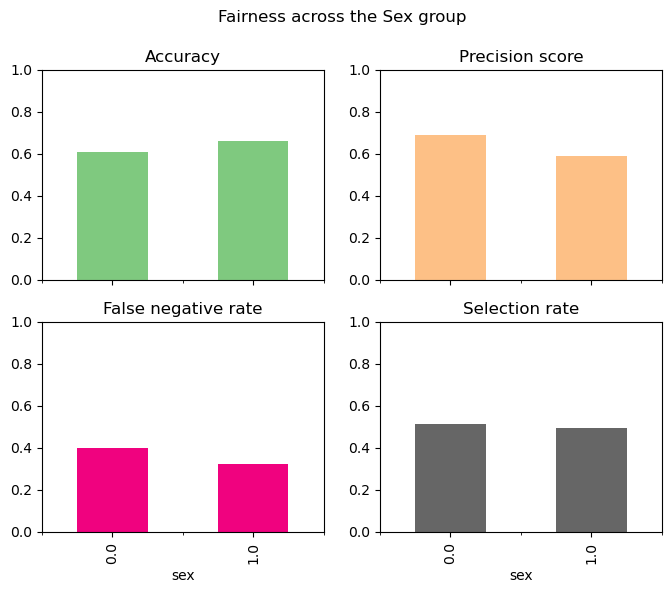

In [472]:
from sklearn.metrics import precision_score
metrics = {
    "Accuracy": accuracy_score,
    "Precision score": precision_score,
    # "false positive rate": false_positive_rate,
     "False negative rate": false_negative_rate,
    "Selection rate": selection_rate,
    # "count": count,
}
metric_frame = MetricFrame(
    metrics=metrics, y_true=test_targets_bal.CVD, y_pred=fair_preds, sensitive_features=test_features_bal.sex
)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[2, 2],
    ylim=[0, 1],
    legend=False,
    figsize=[8, 6],
    colormap="Accent",
    title="Fairness across the Sex group",
)

In [478]:
from sklearn.metrics import confusion_matrix

# Evaluate the fairness-aware model on the test set
fair_preds = fair_model.predict(test_features_bal)
# print("Fairness-Aware Model:")
# print(classification_report(test_targets['stroke'], fair_preds))

# Calculate the confusion matrix
confusion = confusion_matrix(test_targets_bal.CVD, fair_preds)
# print("Confusion Matrix:")
display(Markdown('__Confusion Matrix:__'))
# display(Markdown(confusion))
print(confusion)

# Identify instances where the model makes mistakes
misclassified_indices = np.where(test_targets_bal.CVD != fair_preds)[0]

# Print example misclassified instances
for idx in misclassified_indices[:5]:
    print("Instance:", idx)
    print("Features:", test_features_bal.iloc[idx])
    print("True Label:", test_targets['CVD'].iloc[idx])
    print("Predicted Label:", fair_preds[idx])
    print("--------------------")

__Confusion Matrix:__

[[44 24]
 [30 43]]
Instance: 8
Features: site                               1.000
age                               67.000
sex                                0.000
number_of_children_c               8.000
partnership_status_c_qc            1.000
highest_level_of_education_qc      2.000
occupation_qc                      4.000
ses_site_quintile_c_qc             2.000
smoking_status_c_qc                0.000
alcohol_use_status_c_qc            0.000
days_fruit_qc                      3.000
days_veg_qc                        7.000
days_bread_qc                      5.000
sugardrinks_qc                     1.000
avg_sleep_per_night_c             10.000
mvpa_c                          2400.000
asthma_qc                          0.000
obesity_mom_qc                     1.000
hiv_final_status_c                 0.000
pesticide_qc                       0.000
waist_circumference_qc          1190.000
hip_circumference_qc            1250.000
waist_hip_r_c_qc                   1.000
bp_sys_average_q

In [474]:
from sklearn.preprocessing import StandardScaler
# Get feedback from the user for a specific instance
# from sklearn.preprocessing import scale


user_feedback_instance = 3  # Choose the index of the instance for user feedback

# Get the user's feedback (e.g., correct label)
user_correct_label = 1  # Choose the correct label provided by the user

# Update the model using the user's feedback
updated_train_features = train_features_bal.copy()
updated_train_features.iloc[user_feedback_instance] = test_features_bal.iloc[user_feedback_instance]  # Replace the instance in the training set with the user-provided instance
updated_train_targets = train_targets_bal.copy()
updated_train_targets['CVD'].iloc[user_feedback_instance] = user_correct_label  # Replace the label in the training set with the user-provided correct label

# Retrain the model with the updated training set
# fair_model1 = ExponentiatedGradient(model, constraint)
# Define the fairness-aware model using the ExponentiatedGradient algorithm with Demographic Parity fairness constraint
fair_model1 = ExponentiatedGradient(
    model,
    constraints=DemographicParity(),
    # epsilon=0.05  # Fairness tolerance parameter
)
fair_model1.fit(
    scale.transform(updated_train_features), updated_train_targets['CVD'], 
    sensitive_features=updated_train_features[sensitive_feature])

# Evaluate the updated model
updated_fair_preds = fair_model1.predict(test_features_bal)
print("Updated Fairness-Aware Model:")
print(roc_auc_score(test_targets_bal['CVD'], updated_fair_preds))
print("Updated Fairness-Aware Model:")
print(roc_auc_score(test_targets_bal['CVD'], fair_preds))
# print("Updated Fairness-Aware Model:")
# print(roc_auc_score(test_targets['cardio'], xgb_preds))


AttributeError: 'function' object has no attribute 'transform'

In [399]:
# Measure overall accuracy
overall_accuracy = accuracy_score(test_targets_bal.CVD, fair_preds)
print(" Fair Overall Accuracy:", overall_accuracy)
overall_accuracy = accuracy_score(test_targets_bal.CVD, Y_pred)
print("Overall Accuracy:", overall_accuracy)

 Fair Overall Accuracy: 0.6312056737588653
Overall Accuracy: 0.6170212765957447


In [ ]:
# from IPython.display import display, Markdown, Latex
# display(Markdown('*some markdown* $\phi$'))
# display(Markdown(' eeee $\phi_i$'))
# # If you particularly want to display maths, this is more direct:
# display(Latex('R^{i}'))

In [405]:
model.fit(train_features_bal, train_targets_bal['CVD'])
model.feature_importances_
initial_preds = model.predict(test_features_bal)

# Perform active learning with user feedback
num_instances_to_query = 5  # Number of instances to query for user feedback

# Select the most uncertain instances from the test set
uncertainty_scores = model.predict_proba(test_features_bal)[:, 1]  # Get the probability of the positive class
most_uncertain_indices = np.argsort(np.abs(uncertainty_scores - 0.5))[:num_instances_to_query]
selected_instances = test_features_bal.iloc[most_uncertain_indices]

# Get user feedback for the selected instances
user_feedback_labels = [0, 1, 0, 1, 0]  # Replace with the user-provided feedback labels for the selected instances

# Incorporate the user feedback into the training set
updated_train_features = pd.concat([train_features_bal, selected_instances])
updated_train_target = pd.concat([train_targets_bal['CVD'], pd.Series(user_feedback_labels)])

# Retrain the XGBoost model with the updated training set
updated_xgb_model = xgb.XGBClassifier()
updated_xgb_model.fit(updated_train_features, updated_train_target)

# Evaluate the updated model on the test set
updated_preds = updated_xgb_model.predict(test_features_bal)
print("XGBoost Model:")
print(accuracy_score(test_targets_bal, Y_pred))
print("Fair XGBoost Model:")
print(accuracy_score(test_targets_bal, fair_preds))
print("Updated XGBoost Model:")
print(accuracy_score(test_targets_bal, updated_preds))

XGBoost Model:
0.6170212765957447
Fair XGBoost Model:
0.6312056737588653
Updated XGBoost Model:
0.6028368794326241


##### Work on the missing values. Convert -999 to nan, -111, -222, -555 to positve

In [249]:
test_features_bal['ldl_qc']

,site,age,sex,number_of_children_c,partnership_status_c_qc,highest_level_of_education_qc,occupation_qc,ses_site_quintile_c_qc,smoking_status_c_qc,alcohol_use_status_c_qc,...,mean_cimt_left_qc,s_creatinine_qc,ldl_qc,friedewald_ldl_c_c_qc,triglycerides_qc,acr_qc,bmi_c_qc,cholesterol_1_qc,pain_qc,pain2_qc
6802,3,42,1,6.0,1,1,1,3,1,1,...,0.44,96.17,-222.00,5.099091,1.08,-111.000000,18.54,7.17,0,0
1164,2,62,0,5.0,1,2,0,5,0,0,...,0.68,80.89,3.49,2.601818,1.47,-111.000000,24.96,4.84,1,1
943,4,45,1,7.0,1,1,3,4,2,1,...,0.49,54.64,1.98,1.406364,0.47,-999.000000,17.56,2.97,0,0
5392,2,51,0,1.0,1,1,4,4,0,0,...,0.67,84.71,4.01,3.200909,1.12,0.545455,40.11,5.01,0,0
11170,3,58,1,3.0,1,0,3,4,1,3,...,0.52,62.86,4.19,2.520000,1.65,0.397727,19.03,4.57,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10348,1,48,0,8.0,1,0,4,5,0,0,...,0.67,78.73,4.57,3.158182,0.73,0.500000,29.72,4.68,0,1
4541,1,43,0,1.0,1,2,4,2,0,0,...,0.59,52.06,0.59,1.239091,0.75,0.522222,24.10,2.59,1,1
6037,3,59,1,4.0,1,2,4,3,2,3,...,0.70,71.84,3.74,3.400000,1.10,-111.000000,26.67,5.27,0,0
3225,6,52,1,2.0,0,1,3,2,1,1,...,0.80,73.58,1.89,2.494545,0.54,17.194690,22.05,4.01,-999,-999


In [348]:
predictor_cols1 = ['site', 'age', 'sex', 'number_of_children_c', 
        'partnership_status_c_qc', 'highest_level_of_education_qc', 'occupation_qc',
       'ses_site_quintile_c_qc', 'smoking_status_c_qc',
       'alcohol_use_status_c_qc', 'avg_sleep_per_night_c', 'mvpa_c',
       'obesity_mom_qc','hiv_final_status_c', 'pesticide_qc',
       'waist_circumference_qc', 'hip_circumference_qc', 'waist_hip_r_c_qc',
       'bp_sys_average_qc', 'pulse_average_qc',
       'visceral_fat_qc', 'subcutaneous_fat_qc', 'mean_cimt_right_qc',
       'mean_cimt_left_qc', 'triglycerides_qc',
       'bmi_c_qc', 'cholesterol_1_qc']

In [342]:
treated[predictor_cols1]

,site,age,sex,number_of_children_c,partnership_status_c_qc,highest_level_of_education_qc,occupation_qc,ses_site_quintile_c_qc,smoking_status_c_qc,alcohol_use_status_c_qc,...,bp_sys_average_qc,bp_dia_average_qc,pulse_average_qc,visceral_fat_qc,subcutaneous_fat_qc,mean_cimt_right_qc,mean_cimt_left_qc,triglycerides_qc,bmi_c_qc,cholesterol_1_qc
0,1.0,80.0,1.0,10.0,1.0,0.0,4.0,1.0,2.0,3.0,...,144.0,89.0,84.0,7.0,2.0,1.0,1.0,3.0,23.0,5.0
1,1.0,73.0,1.0,5.0,1.0,0.0,4.0,4.0,0.0,3.0,...,124.0,80.0,68.0,9.0,3.0,1.0,1.0,2.0,37.0,3.0
2,1.0,80.0,1.0,9.0,2.0,0.0,4.0,2.0,0.0,0.0,...,140.0,56.0,41.0,5.0,2.0,1.0,1.0,1.0,22.0,6.0
3,1.0,79.0,0.0,4.0,1.0,0.0,3.0,2.0,0.0,0.0,...,123.0,67.0,70.0,5.0,2.0,1.0,1.0,2.0,22.0,5.0
4,1.0,73.0,0.0,7.0,2.0,0.0,3.0,3.0,0.0,0.0,...,134.0,74.0,90.0,6.0,3.0,1.0,1.0,2.0,29.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12027,6.0,57.0,0.0,4.0,2.0,1.0,1.0,2.0,0.0,1.0,...,118.0,79.0,59.0,3.0,5.0,1.0,1.0,1.0,25.0,6.0
12028,2.0,50.0,0.0,3.0,0.0,2.0,1.0,2.0,0.0,0.0,...,132.0,94.0,74.0,9.0,2.0,1.0,1.0,1.0,25.0,6.0
12029,1.0,76.0,1.0,3.0,1.0,0.0,4.0,1.0,0.0,1.0,...,127.0,77.0,55.0,6.0,1.0,1.0,1.0,1.0,18.0,4.0
12030,2.0,59.0,0.0,7.0,2.0,2.0,3.0,5.0,0.0,0.0,...,128.0,87.0,66.0,10.0,2.0,1.0,1.0,2.0,37.0,7.0


In [349]:
from lime.lime_tabular import LimeTabularExplainer

# Train an interpretable model
interpretable_model = xgb.XGBClassifier()
interpretable_model.fit(train_features_bal[predictor_cols1], train_targets_bal['CVD'])

# Create an explainer for LIME
explainer_lime = LimeTabularExplainer(train_features_bal[predictor_cols1].values, feature_names=train_features_bal[predictor_cols1].columns, class_names=['No CVD', 'CVD'])

# Choose an instance for explanation
instance_idx = np.random.choice(a=test_features_bal.index, size=1)  # Choose the index of the instance you want to explain
print(instance_idx)
# Generate LIME explanation for the chosen instance
lime_exp = explainer_lime.explain_instance(test_features_bal[predictor_cols1].iloc[33], interpretable_model.predict_proba, num_features=len(test_features_bal[predictor_cols1].columns))

# Print the explanation
lime_exp.show_in_notebook(show_table=True)

[8976]


In [350]:
# SHAP Analysis
shap.initjs()
model.fit(train_features_bal[predictor_cols1], train_targets_bal['CVD'])
explainer = shap.Explainer(model, train_features_bal[predictor_cols1])
shap_values = explainer(test_features_bal[predictor_cols1])

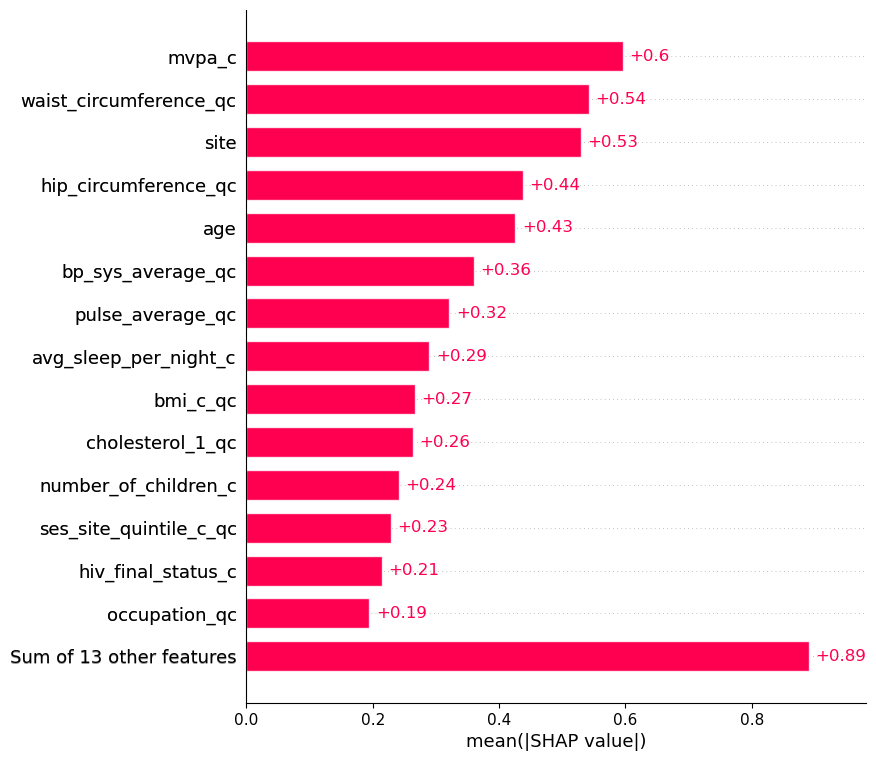

In [351]:
shap.plots.bar(shap_values, max_display=15)

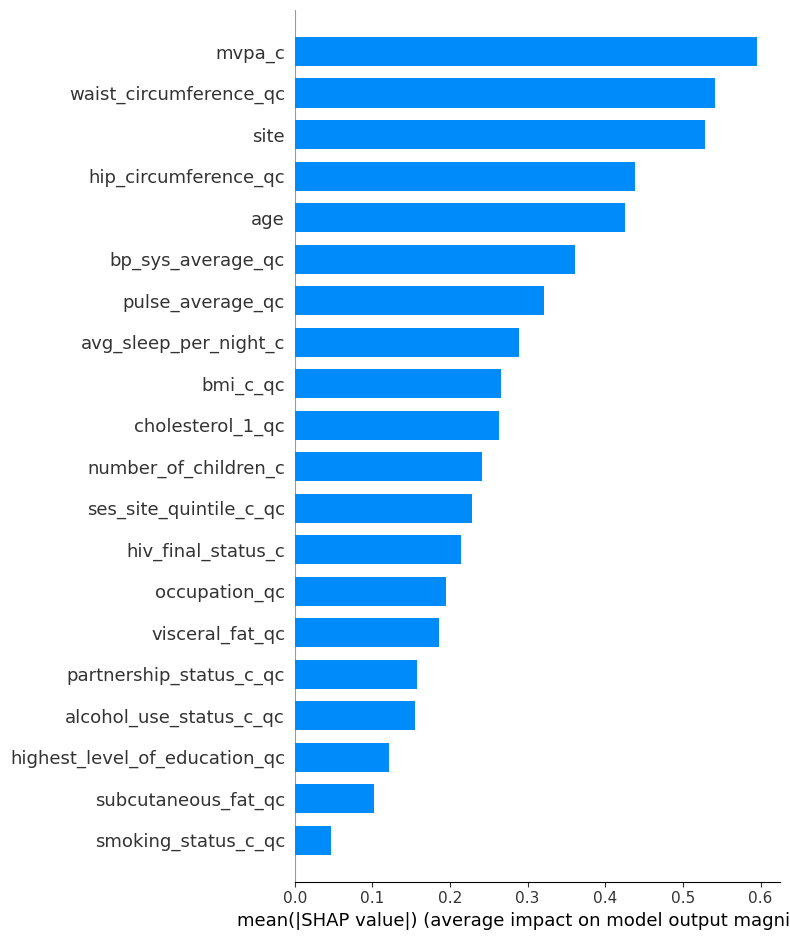

In [363]:
shap.summary_plot(shap_values, plot_type = 'bar' )

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


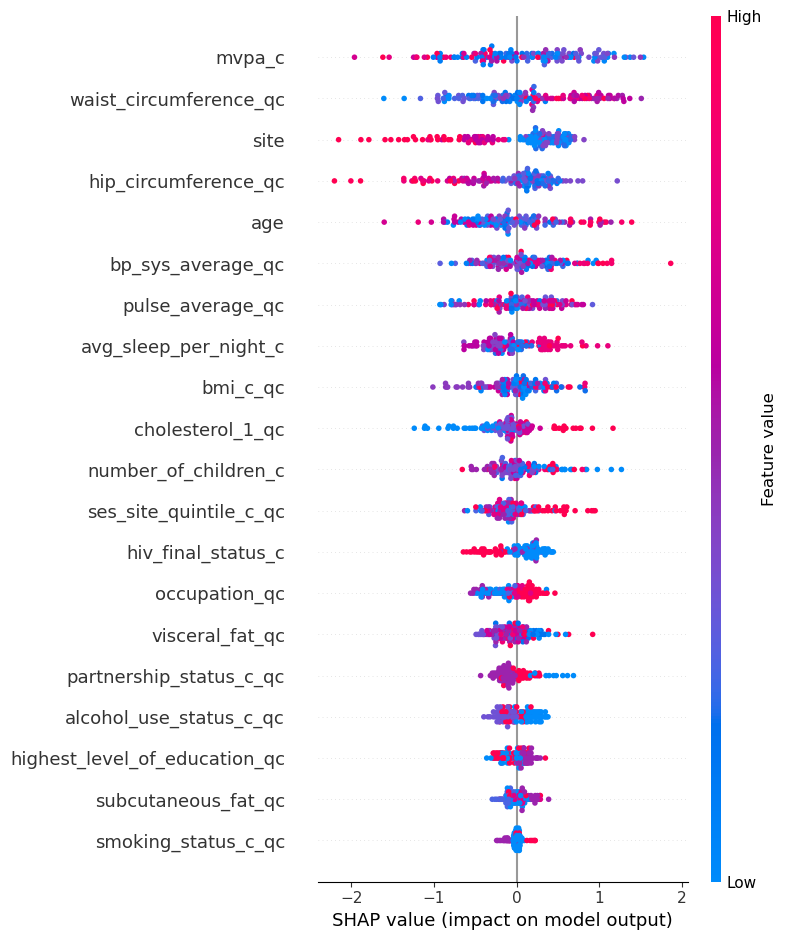

In [352]:
shap.summary_plot(shap_values, test_features_bal[predictor_cols1], feature_names = predictor_cols1)

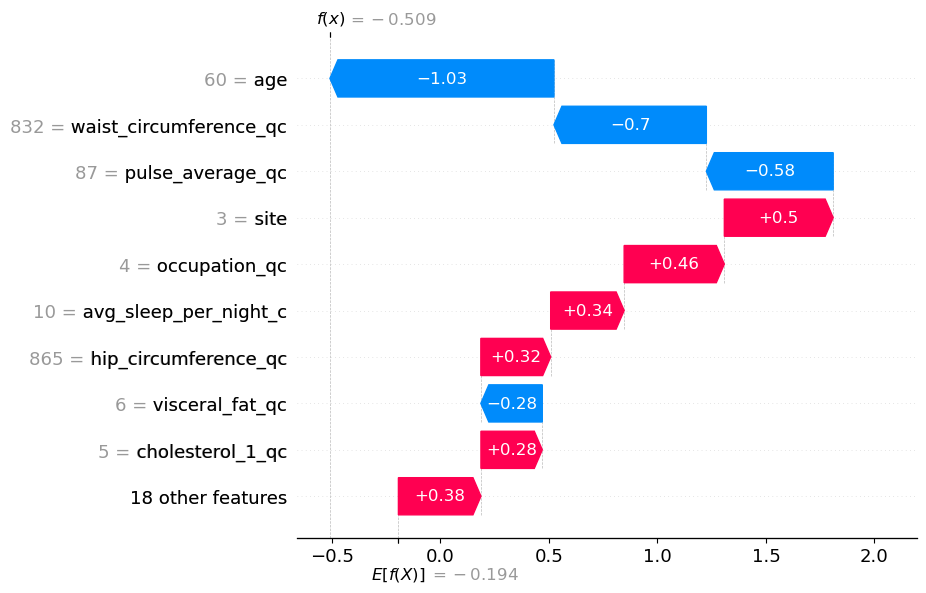

In [353]:
shap.plots.waterfall(shap_values[0])

In [356]:
shap_values

.values =
array([[ 0.50171334, -1.03242295, -0.03797257, ...,  0.00725254,
         0.07722771,  0.28275105],
       [ 0.10990344,  0.2082829 ,  0.02463456, ...,  0.00402969,
        -0.86065599,  0.04724296],
       [ 0.37096541, -0.48904817,  0.0072698 , ...,  0.05895896,
         0.24209653,  0.47372171],
       ...,
       [ 0.14495289,  1.05798012,  0.01649099, ...,  0.03586345,
         0.48178802, -0.27761939],
       [-1.13842745,  0.54857523, -0.10927409, ...,  0.02179125,
        -0.09764561,  0.09863773],
       [-0.35640757, -0.1432855 , -0.08009736, ..., -0.02714232,
        -0.20511689, -0.51314901]])

.base_values =
array([-0.19387686, -0.19387686, -0.19387686, -0.19387686, -0.19387686,
       -0.19387686, -0.19387686, -0.19387686, -0.19387686, -0.19387686,
       -0.19387686, -0.19387686, -0.19387686, -0.19387686, -0.19387686,
       -0.19387686, -0.19387686, -0.19387686, -0.19387686, -0.19387686,
       -0.19387686, -0.19387686, -0.19387686, -0.19387686, -0.19387686,
 

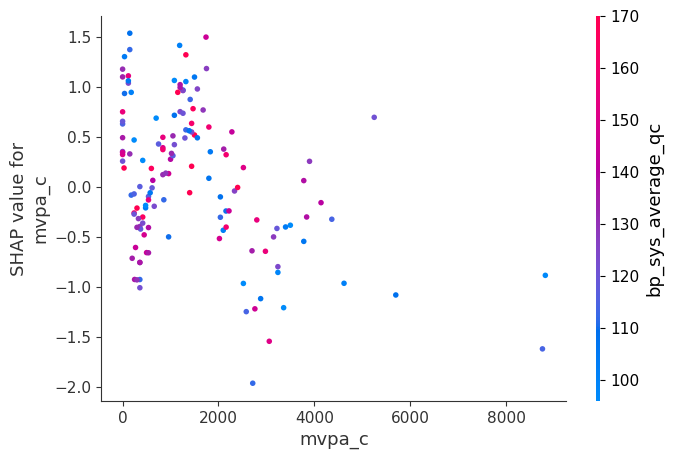

In [362]:
shap.dependence_plot("mvpa_c", shap_values.values, test_features_bal[predictor_cols1])

In [367]:
shap.force_plot(explainer.expected_value, shap_values.values[0], test_features_bal[predictor_cols1])

Exception: Length of features is not equal to the length of shap_values!

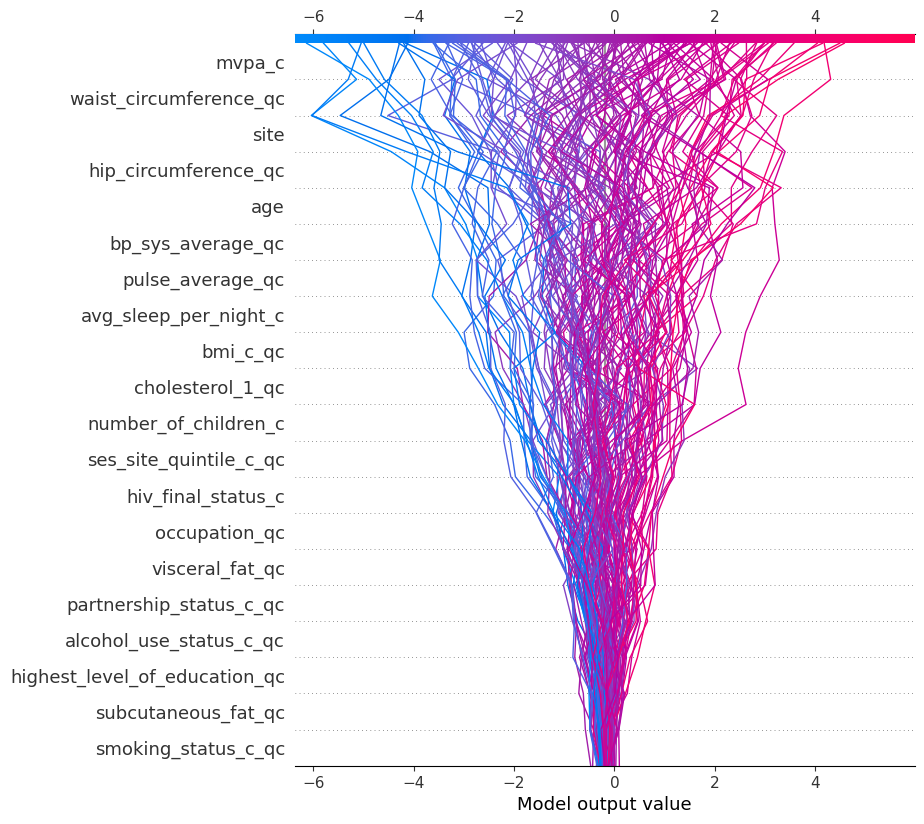

In [377]:
shap.decision_plot(explainer.expected_value, shap_values.values, features = test_features_bal.iloc[33,:], feature_names = predictor_cols1)